### Исследование модификаций Стохастического градиентного спуска

In [30]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

from utils import *

In [19]:
## Обычный sgd
def sgd(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, 1)(*x))
        points[i] = x
    return points

In [32]:
def grad_batch(f, batch_size):
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        batch = set(np.random.choice(np.arange(dim), batch_size, replace=False))
        return [0 if i not in batch else
                (f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                - f(*[args[j] - (h if j == i else 0) for j in range(dim)]))
                /(2*h)
                for i in range(dim)]
    return grad_help

In [45]:
def sgd(f, epoch, x, lr0 = 0.01, d=0.01):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, 1)(*x))
        points[i] = x
    return points

#### Реализации разных модификаций

In [53]:
def momentum(f, epoch, x, lr0 = 0.01, alpha = 0.2):
    points = np.zeros((epoch, 2))
    points[0] = x
    dx = 0
    for i in range(1, epoch):
        dx = alpha * dx - lr0 * np.array(grad_batch(f, 1)(*x))
        print(dx)
        x = x + dx
        points[i] = x
    return points

In [60]:
def ada_grad(f, epoch, x, lr0 = 1):
    points = np.zeros((epoch, 2))
    points[0] = x
    s = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, 1)(*x))
        s += g**2
        print(s)
        x = x - lr0 * (g / np.sqrt(s))
        points[i] = x
    return points

In [22]:
def rms_prop(f, epoch, x, lr0 = 1, alpha = 1):
    points = np.zeros((epoch, 2))
    points[0] = x
    v = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, 1)(*x))
        v = alpha * v + (1 - alpha) * g**2
        x -= lr0 / np.sqrt(v)*g
        points[i] = x
    return points

In [23]:
def adam(f, epoch, x, lr0 = 1, alpha = 0.9, beta = 0.999):
    points = np.zeros((epoch, 2))
    points[0] = x
    m = 0
    v = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, 1)(*x))
        m = alpha * m + (1-alpha)*g
        v = beta * v + (1 - beta) * g**2

        m_ = m/(1-alpha)
        v_ = v/(1-beta)

        x -= lr0*m_/(np.sqrt(v_) + 0.0001) 
        points[i] = x
    return points

In [27]:
def regression(method, x, y):
    if x.ndim == 1:
        x_mat = np.array([np.full(len(x), 1), x]).T
        k = 2
    else:
        x_mat = np.insert(x, 0, 1, axis=1)
        k = len(np.array(x[0])) + 1
    f = lambda *b: np.linalg.norm((y - x_mat.dot(np.array(b)))**2)
    bs = method(f, 100, np.full(k,1))
    
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()

In [28]:
n = 10 
x = np.arange(n);

k, b = 2, -1

y = k*x + b + np.random.rand(n)

x,y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([-0.63363216,  1.55817192,  3.00757458,  5.13233779,  7.53113794,
         9.52932572, 11.41865055, 13.45326827, 15.6948307 , 17.43029845]))

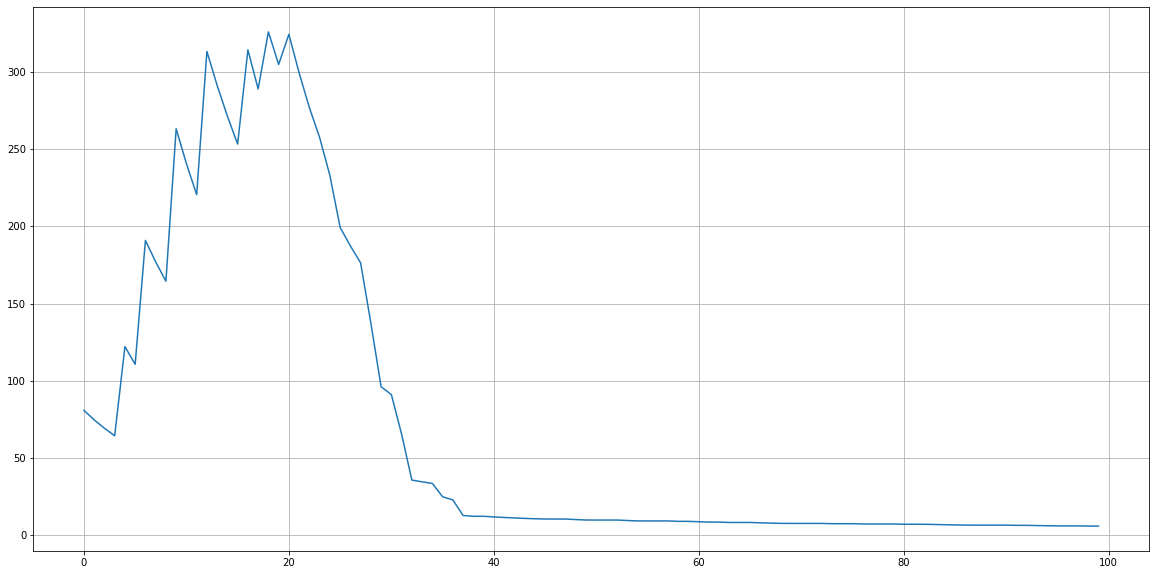

In [46]:
regression(sgd, x, y)

[632.44856169   0.        ]
[632.44856169          nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan

C:\Users\kanad\AppData\Local\Temp\ipykernel_7432\3309842404.py:9: RuntimeWarning: invalid value encountered in true_divide
  x = x - lr0 * (g / np.sqrt(s))


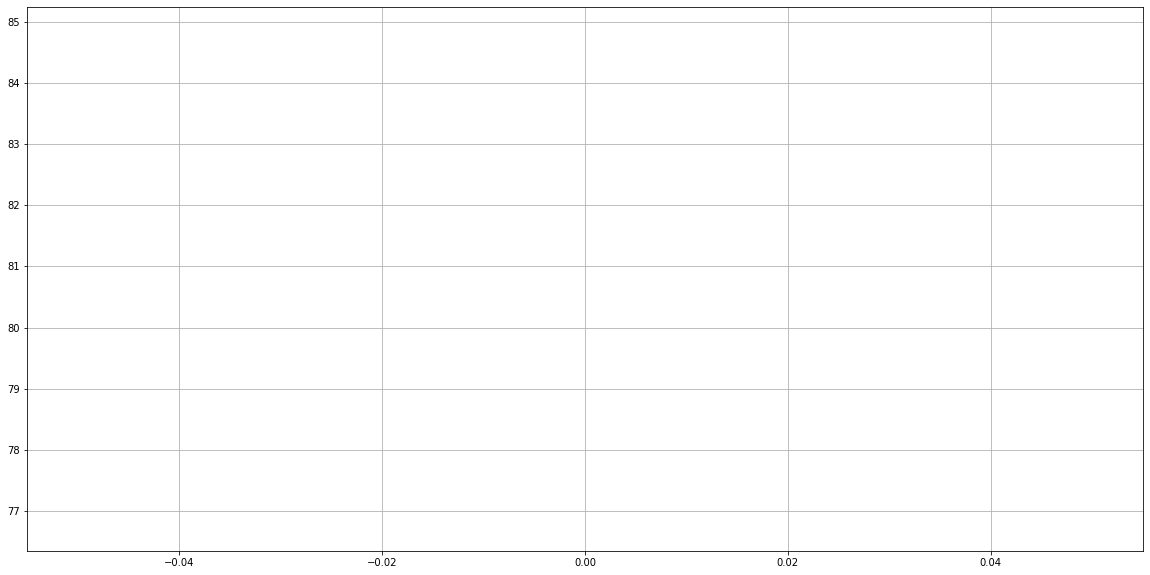

In [61]:
regression(ada_grad, x,y)